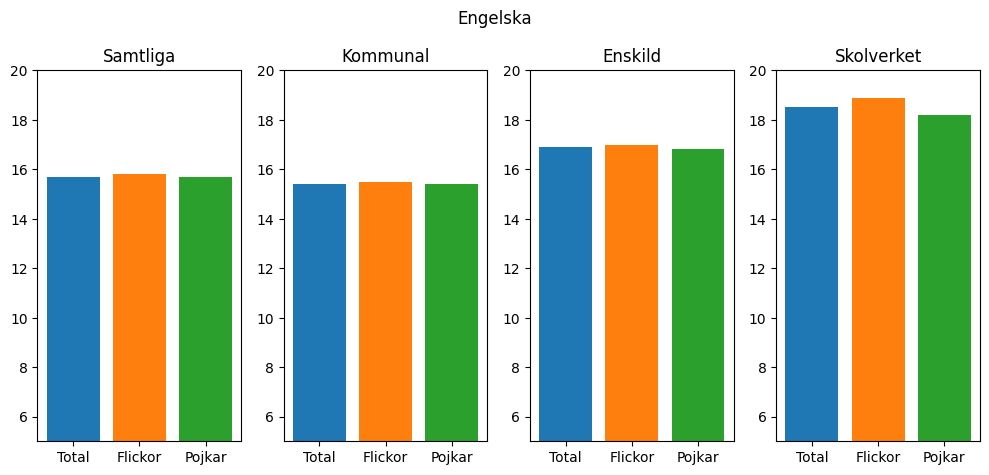

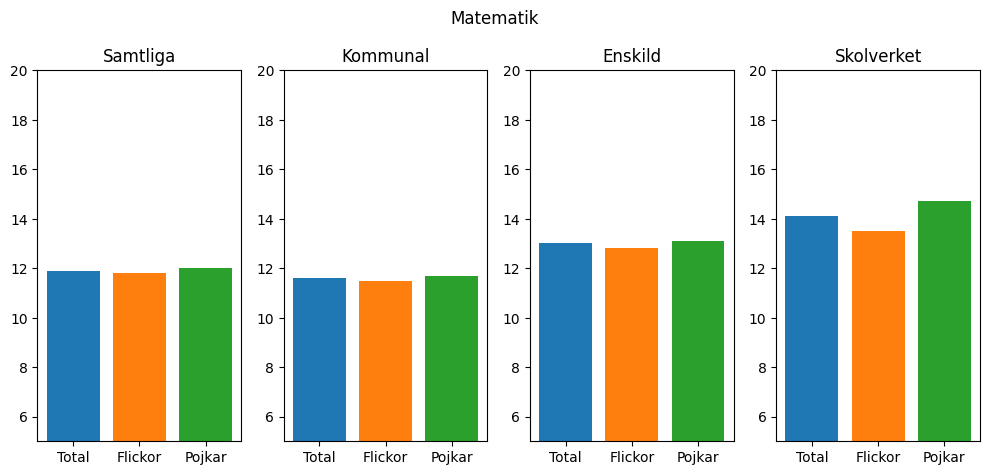

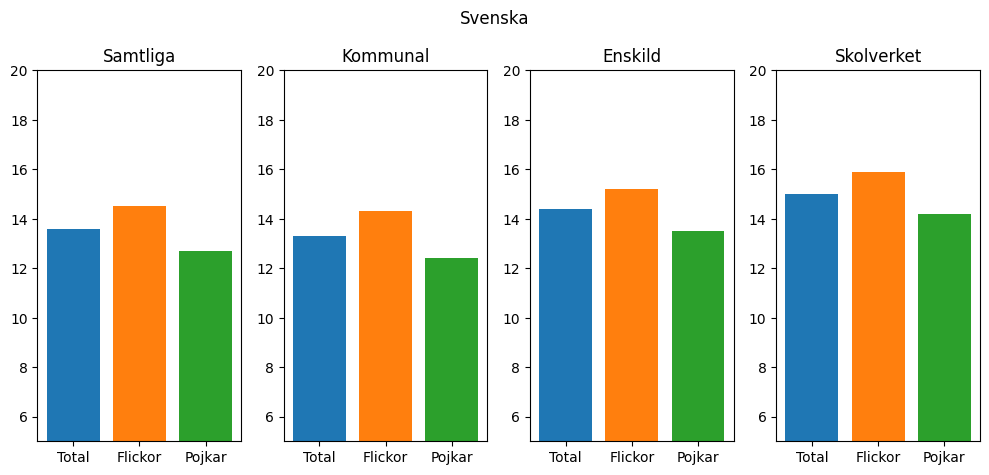

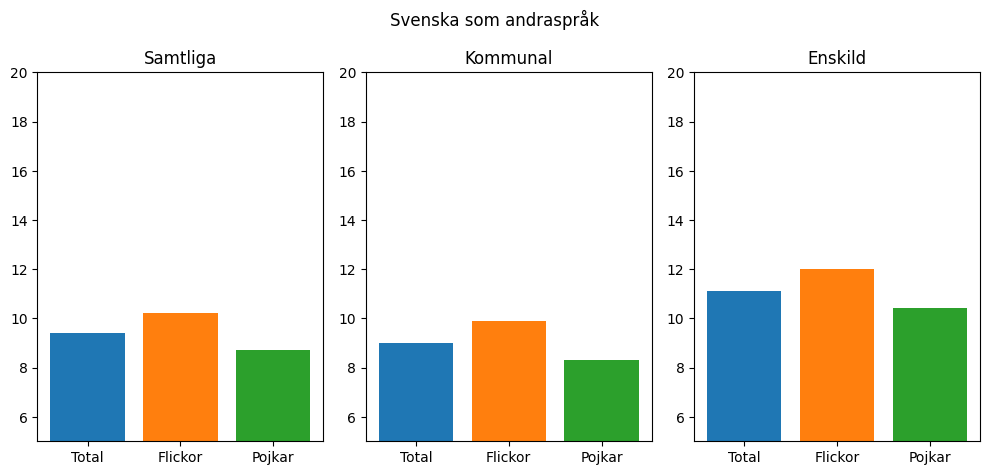

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#lista med alla sheet namnen
sheet_list = ['Engelska','Matematik','Svenska','Svenska som andraspråk']

#proxy för excel filen
xlsxfile = pd.ExcelFile("riket2023_åk9_np.xlsx")
sheet_loop_counter = 0
for i in sheet_list:
    df = pd.read_excel(xlsxfile, sheet_list[sheet_loop_counter])
    df.columns = ['Plats', 'Huvudman', 'Totalt(A-F)', 'Flickor(A-F)', 'Pojkar(A-F)', 'Totalt(A-E)', 'Flickor(A-E)', 'Pojkar(A-E)', 'Totalt(poäng)', 'Flickor(poäng)', 'Pojkar(poäng)']
    df = df.drop(df.index[:8])
    df = df.reset_index(drop=True)
    #tar bort skolverket raden för sheet "Svenska som andraspråk" då den inte har någon data och är därför irrelevant
    if (df.iloc[3,8] == '..'):
        df = df.drop(df.index[3])
    #gör subplots baserat på hur många bars som behövs
    fig, axs = plt.subplots(1, df.Huvudman.count())
    #för att göra det enklare att se värderna
    fig.set_tight_layout(True)
    fig.set_figwidth(10)
    ylimit = (5, 20)
    plt.setp(axs, ylim = ylimit)
    #nämner subplot blocken efter deras data sheet (t.ex. Engelska)
    fig.suptitle(sheet_list[sheet_loop_counter])
    subplot_loop_counter = 0
    for i in df.Huvudman:
        axs[subplot_loop_counter].set_title(df.Huvudman[subplot_loop_counter])
        axs[subplot_loop_counter].bar('Total', df.iloc[subplot_loop_counter, 8])
        axs[subplot_loop_counter].bar('Flickor', df.iloc[subplot_loop_counter, 9])
        axs[subplot_loop_counter].bar('Pojkar', df.iloc[subplot_loop_counter, 10])
        subplot_loop_counter = subplot_loop_counter + 1
    fig.savefig(f"visualiseringar/matplot_graph_{sheet_list[sheet_loop_counter]}.png")
    sheet_loop_counter = sheet_loop_counter + 1